In [1]:
import pandas as pd
import sqlite3 as sq
import numpy as np
import surprise

## Import data from processed database


In [2]:
#Set up data
path = '/db/amazon_book_reviews_final.db'
def import_data(db_path):
    conn = sq.connect(db_path) #sqliteDB path goes in parantheses
    crsr = conn.cursor()

    df = pd.read_sql_query('''
                SELECT *
                FROM processed
                ;
                ''', conn)

    df['star_rating'] = df['star_rating'].astype(float)
    df['star_rating'] = df['star_rating'].astype(int) #convert rating to integer type
    df['helpful_votes'] = df['helpful_votes'].astype(int) #convert rating to integer type  


    return df

df = import_data(path)

In [3]:
df.head(5)

,level_0,index,customer_id,product_id,product_title,review_body,star_rating,helpful_votes,author,book_category,product_title_length,review_body_length,cleaned_sentiment_star_rating,difference
0,0,0,33678379,080072433X,Trial Run (Fault Lines),This book I actually had a hard time with. I p...,3,0,Thomas Locke,None,23,1427,3.00942,0.00942
1,1,1,32882152,043985654X,How Do Dinosaurs Play with Their Friends?,nice book for young children,5,0,JANE YOLEN/MARK,"Fiction, -, Animals",41,28,3.70000,1.30000
2,2,2,40676812,075700394X,Sodium Bicarbonate: Nature's Unique First Aid ...,Excellent--,5,0,Mark Sircus,"Medical, Holistic, Medicine",52,11,5.00000,0.00000
3,3,3,14885930,0399142789,"Conversations with God: An Uncommon Dialogue, ...",LOVE this book. Read before in the 90's and wa...,5,0,Neale Donald,"Religious, Inspiration, New",52,137,3.50000,1.50000
4,4,4,14534220,1844839737,The Big Book of Juices: More Than 400 Natural ...,good,5,0,Cannot Locate,None,86,4,4.40000,0.60000


In [4]:
len(df)
df.dtypes

level_0                            int64
index                              int64
customer_id                        int64
product_id                        object
product_title                     object
review_body                       object
star_rating                        int64
helpful_votes                      int64
author                            object
book_category                     object
product_title_length               int64
review_body_length                 int64
cleaned_sentiment_star_rating    float64
difference                       float64
dtype: object

# YellowBrick Viz SKIP


In [10]:
num_dat = df[["star_rating","helpful_votes","product_title_length","review_body_length","cleaned_sentiment_star_rating","difference"]]

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


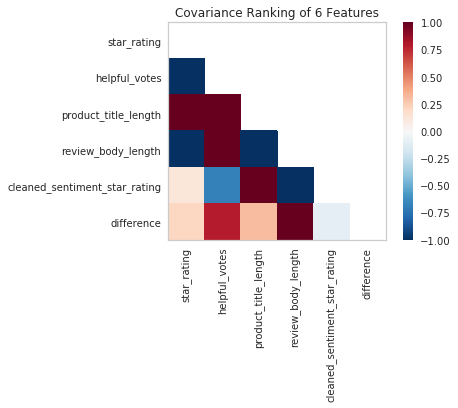

In [12]:
from yellowbrick.features import Rank2D
%matplotlib inline

visualizer = Rank2D(algorithm="covariance")
visualizer.fit_transform(num_dat)
visualizer.poof()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


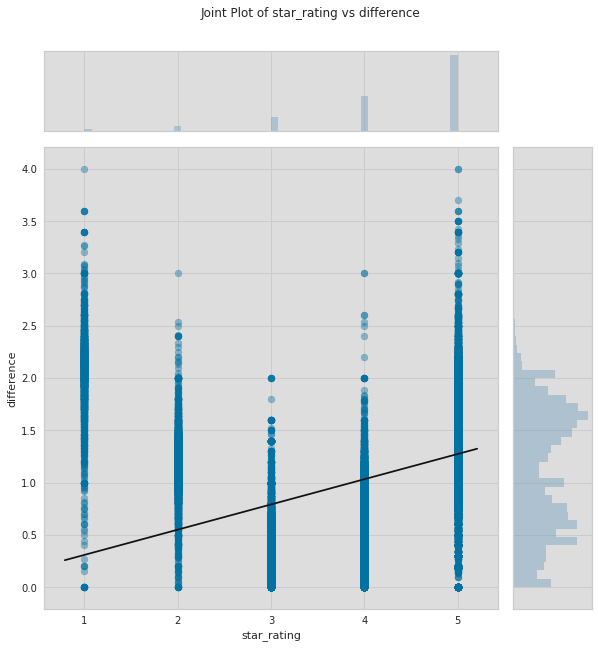

In [13]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='star_rating', target='difference')
visualizer.fit(df['star_rating'], df['difference'])
visualizer.poof()

In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='sentiment_star_rating', target='cleaned_sentiment_star_rating')
visualizer.fit(X_dat['sentiment_star_rating'], X_dat['cleaned_sentiment_star_rating'])
visualizer.poof()

In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='sentiment_star_rating', target='star_rating')
visualizer.fit(X_dat['sentiment_star_rating'], X_dat['star_rating'])
visualizer.poof()

np.corrcoef(X_dat['sentiment_star_rating'], X_dat['star_rating'])


In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='cleaned_sentiment_star_rating', target='star_rating')
visualizer.fit(X_dat['cleaned_sentiment_star_rating'], X_dat['star_rating'])
visualizer.poof()

np.corrcoef(X_dat['cleaned_sentiment_star_rating'], X_dat['star_rating'])


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


array([[ 1.       ,  0.3781037],
       [ 0.3781037,  1.       ]])

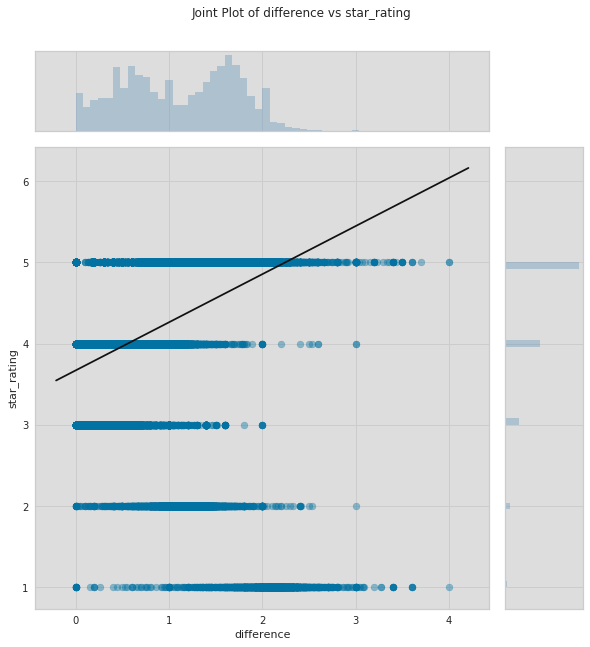

In [15]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='difference', target='star_rating')
visualizer.fit(num_dat['difference'], num_dat['star_rating'])
visualizer.poof()

np.corrcoef(num_dat['difference'], num_dat['star_rating'])

## Clustering  SKIP

In [17]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(4,12))

visualizer.fit(df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

ValueError: could not convert string to float: 'Animal, Breeding, Evolution'

In [ ]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_dat) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

# Modeling in Sci-Kit Learn

### SVD 

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
df_pivot = df.pivot_table(index='customer_id',columns='product_id',values='star_rating',fill_value=0)
X = df_pivot.T
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
corr = np.corrcoef(matrix)
book_title = df_pivot.columns

In [ ]:
def print_recs(book_title, corr, title):
    book_list = book_title.tolist()
    book_title = np.asarray(book_title)

    book_idx = book_list.index(title)
    corr_target = corr[book_idx]
    corrs = np.concatenate((book_title,corr_target),axis=0)

    top_5_idx = np.argsort(corr_target)[-6:-1]
    top_5_values = [book_title[i] for i in top_5_idx]
    print(top_5_values)


print_recs(book_title, corr, "The Stand")

### NMF


In [18]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
df_pivot = df.pivot_table(index='customer_id',columns='product_title',values='star_rating',fill_value=0)
X = df_pivot.T
NMFmod = NMF(n_components=12)
matrix = NMFmod.fit_transform(X)
corr = np.corrcoef(matrix)
book_title = df_pivot.columns

In [19]:
def print_recs(book_title, corr, title):
    book_list = book_title.tolist()
    book_title = np.asarray(book_title)

    book_idx = book_list.index(title)
    corr_target = corr[book_idx]
    corrs = np.concatenate((book_title,corr_target),axis=0)

    top_5_idx = np.argsort(corr_target)[-6:-1]
    top_5_values = [book_title[i] for i in top_5_idx]
    print(top_5_values)


print_recs(book_title, corr, "The Stand")

['The Modern Kama Sutra: The Ultimate Guide to the Secrets of Erotic Pleasure', "Rick Steves' Italy Map: Including Rome, Florence, Venice and Siena City", 'Handbook of United States Coins 2015: The Official Blue Book', 'The Valiant', 'Thomas & Friends Story Time Collection (Thomas & Friends)']


# Modeling in LightFM
Will allow for incorporation of product metadata!

In [20]:
def create_interaction_matrix(df,user_col, item_col, rating_col, norm= False, threshold = None):
    '''
    Function to create an interaction matrix dataframe from transactional type interactions
    Required Input -
        - df = Pandas DataFrame containing user-item interactions
        - user_col = column name containing user's identifier
        - item_col = column name containing item's identifier
        - rating col = column name containing user feedback on interaction with a given item
        - norm (optional) = True if a normalization of ratings is needed
        - threshold (required if norm = True) = value above which the rating is favorable
    Expected output - 
        - Pandas dataframe with user-item interactions ready to be fed in a recommendation algorithm
    '''
    interactions = df.groupby([user_col, item_col])[rating_col] \
            .sum().unstack().reset_index(). \
            fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions


def create_user_dict(interactions):
    '''
    Function to create a user dictionary based on their index and number in interaction dataset
    Required Input - 
        interactions - dataset create by create_interaction_matrix
    Expected Output -
        user_dict - Dictionary type output containing interaction_index as key and user_id as value
    '''
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict
    
def create_item_dict(df,id_col,name_col):
    '''
    Function to create an item dictionary based on their item_id and item name
    Required Input - 
        - df = Pandas dataframe with Item information
        - id_col = Column name containing unique identifier for an item
        - name_col = Column name containing name of the item
    Expected Output -
        item_dict = Dictionary type output containing item_id as key and item_name as value
    '''
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict


def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run 
        - n_jobs = number of cores used for execution 
    Expected Output  -
        Model - Trained model
    '''
    x = csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

def create_item_emdedding_distance_matrix(model,interactions):
    '''
    Function to create item-item distance embedding matrix
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
    Expected Output -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
    '''
    df_item_norm_sparse = csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    print(similarities[0])

    #item_emdedding_distance_matrix = pd.DataFrame(similarities)
    #item_emdedding_distance_matrix.columns = interactions.columns
    #item_emdedding_distance_matrix.index = interactions.columns
    #return item_emdedding_distance_matrix

def item_item_recommendation(item_emdedding_distance_matrix, item_id, 
                             item_dict, n_items = 10, show = True):
    '''
    Function to create item-item recommendation
    Required Input - 
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
        - item_id  = item ID for which we need to generate recommended items
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - n_items = Number of items needed as an output
    Expected Output -
        - recommended_items = List of recommended items
    '''
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id,:]. \
                                  sort_values(ascending = False).head(n_items+1). \
                                  index[1:n_items+1]))
    if show == True:
        print("Item of interest :{0}".format(item_dict[item_id]))
        print("Item similar to the above item:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' +  item_dict[i])
            counter+=1
    return recommended_items

In [21]:
# Creating interaction matrix using rating data
interactions = create_interaction_matrix(df = df,
                                         user_col = 'customer_id',
                                         item_col = 'product_title',
                                         rating_col = 'star_rating')
interactions.head()

product_title,#GIRLBOSS,&#34;I Know the Plans&#34; Flexcover Journal,'Don't Make the Black Kids Angry': The hoax of black victimization and those who enable it.,'Salem's Lot,'Til the Well Runs Dry: A Novel,'White Girl Bleed A Lot': The Return of Racial Violence to America and How the Media Ignore It,002: Maus II: A Survivor's Tale: And Here My Troubles Began (Pantheon Graphic Novels),"1,000 Gluten-Free Recipes (1,000 Recipes)","1,000 Places to See Before You Die: Revised Second Edition","1,000 Unforgettable Senior Moments: Of Which We Could Remember Only 246",...,iPhone 5 For Dummies,iPhone For Seniors For Dummies,iPhone: The Missing Manual,iPhone: The Missing Manual (Missing Manuals),"knit, Swirl! Uniquely Flattering, One Piece, One Seam Swirl Jackets; Foreword by Cat Bordhi",salt.,the Next EXIT (2013) (Next Exit: The Most Complete Interstate Highway Guide Ever Printed),unPHILtered: The Way I See It,xkcd: volume 0,¿Eres Mi Mama? (Bright & Early Board Books(TM)) (Spanish Edition)
customer_id,,,,,,,,,,,,,,,,,,,,,
96533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create User Dict
user_dict = create_user_dict(interactions=interactions)
# Create Item dict
movies_dict = create_item_dict(df = df,
                               id_col = 'product_id',
                               name_col = 'product_id')

In [ ]:
from scipy.sparse import csr_matrix
from lightfm import LightFM
mf_model = runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

In [ ]:
## Creating item-item distance matrix
from sklearn.metrics.pairwise import cosine_similarity
item_item_dist = create_item_emdedding_distance_matrix(model = mf_model,
                                                       interactions = interactions)

In [ ]:
## Calling 10 recommended items for item id 
rec_list = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                    item_id = 5378,
                                    item_dict = movies_dict,
                                    n_items = 10)

# Modeling in Suprise  Works best for User-Item and no metadata


In [ ]:
from surprise import Reader, Dataset

# to load dataset from pandas df, we need `load_fromm_df` method in surprise lib

ratings_dict = {'itemID': list(df.product_title),
                'userID': list(df.customer_id),
                'rating': list(df.star_rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is required.
# The Reader class is used to parse a file containing ratings.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_k(predictions, k):
    '''Return a top_k dicts where keys are user ids and values are lists of
    tuples [(item id, rating estimation) ...].

    Takes in a list of predictions as returned by the test method.
    '''

    # First map the predictions to each user.
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x:x[1], reverse=True)
        top_k[uid] = user_ratings[:k]

    return top_k

In [ ]:
trainset = data.build_full_trainset()

algo = SVD()
algo.fit(trainset)

In [ ]:
# We are here testing on the WHOLE dataset. Which means that all the ratings we
# are predicting are already known, but it does not really matter.
testset = data.construct_testset(raw_testset=data.raw_ratings)
predictions = algo.test(testset)
#accuracy.rmse(predictions, verbose=True)  # ~ 0.68 (which is low)

#print(predictions)




In [ ]:
top_k = get_top_k(predictions, 5)

# Print the recommended items
for uid, user_ratings in top_k.items():
    print(uid, [iid for (iid, _) in user_ratings])



# Compute the total number of recommended items.
all_recommended_items = set(iid for (_, user_ratings) in top_k.items() for
                            (iid, _) in user_ratings)

print('Number of recommended items:', len(all_recommended_items), 'over',
      len(top_k), 'users')